In [1]:
import cv2
import numpy as np
import scipy
import glob
from scipy import ndimage
from skimage.registration import phase_cross_correlation
from plot_utils import *

tavg_image_paths = glob.glob(f'viz_outputs/tavg_20/*.bmp')
tavg_input_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in tavg_image_paths]

In [2]:
# load data from matlab
matlab0 = scipy.io.loadmat('viz_outputs/tavg_20_matlab/canny_wiener_naive.mat')

matlab1 = scipy.io.loadmat('viz_outputs/tavg_20_matlab/canny_only.mat')
matlab2 = scipy.io.loadmat('viz_outputs/tavg_20_matlab/canny_wiener_disk3.mat')
matlab3 = scipy.io.loadmat('viz_outputs/tavg_20_matlab/canny_wiener_disk5.mat')
matlab4 = scipy.io.loadmat('viz_outputs/tavg_20_matlab/canny_wiener_avg3.mat')
matlab5 = scipy.io.loadmat('viz_outputs/tavg_20_matlab/canny_wiener_avg5.mat')

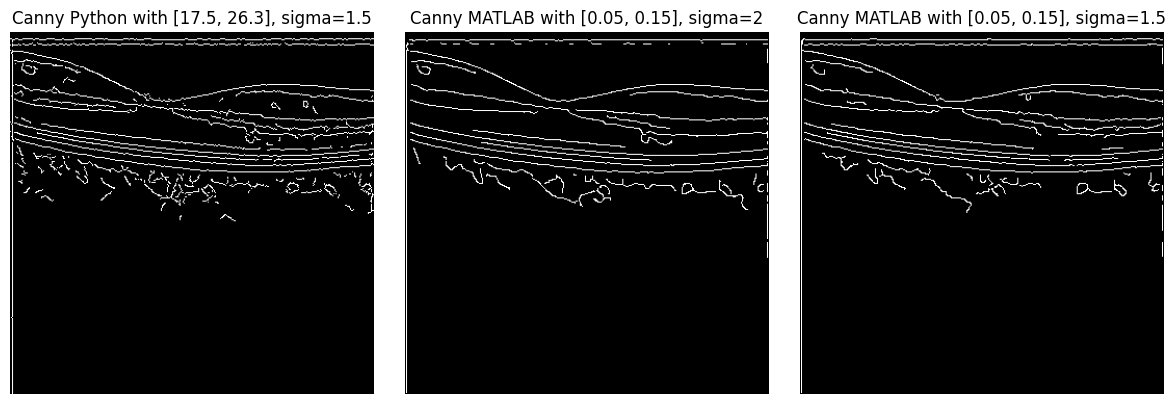

In [3]:
temporal = tavg_input_images[0]
temporal = cv2.GaussianBlur(temporal, (0, 0), 1.5)
temporal = cv2.Canny(temporal, 17.5, 26.3, 3)

images = [[temporal, matlab1['canny_20'], matlab1['canny_15']]]
titles = [['Canny Python with [17.5, 26.3], sigma=1.5', 'Canny MATLAB with [0.05, 0.15], sigma=2', 'Canny MATLAB with [0.05, 0.15], sigma=1.5']]

plot_images(images, titles, dpi=100)

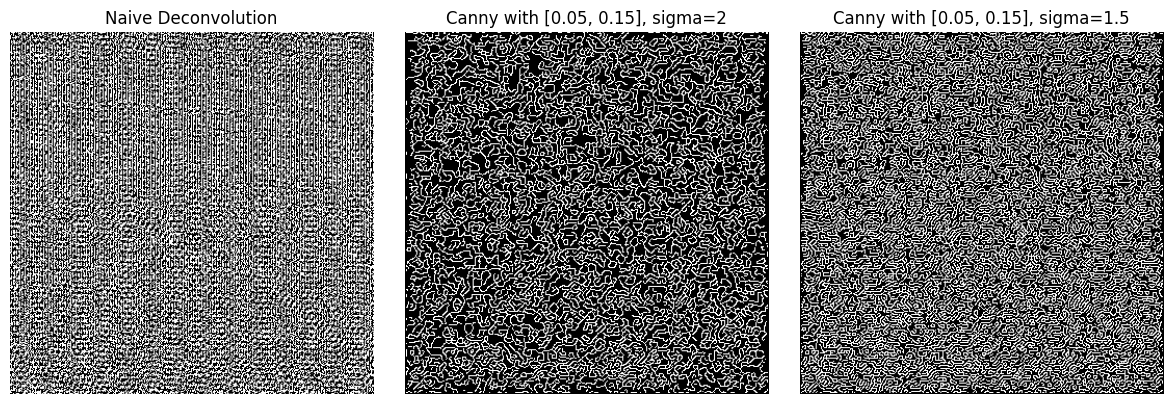

In [4]:
images = [[matlab0['wnr_img'], matlab0['canny_20'], matlab0['canny_15']]]
titles = [['Naive Deconvolution', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5']]

plot_images(images, titles, dpi=100)

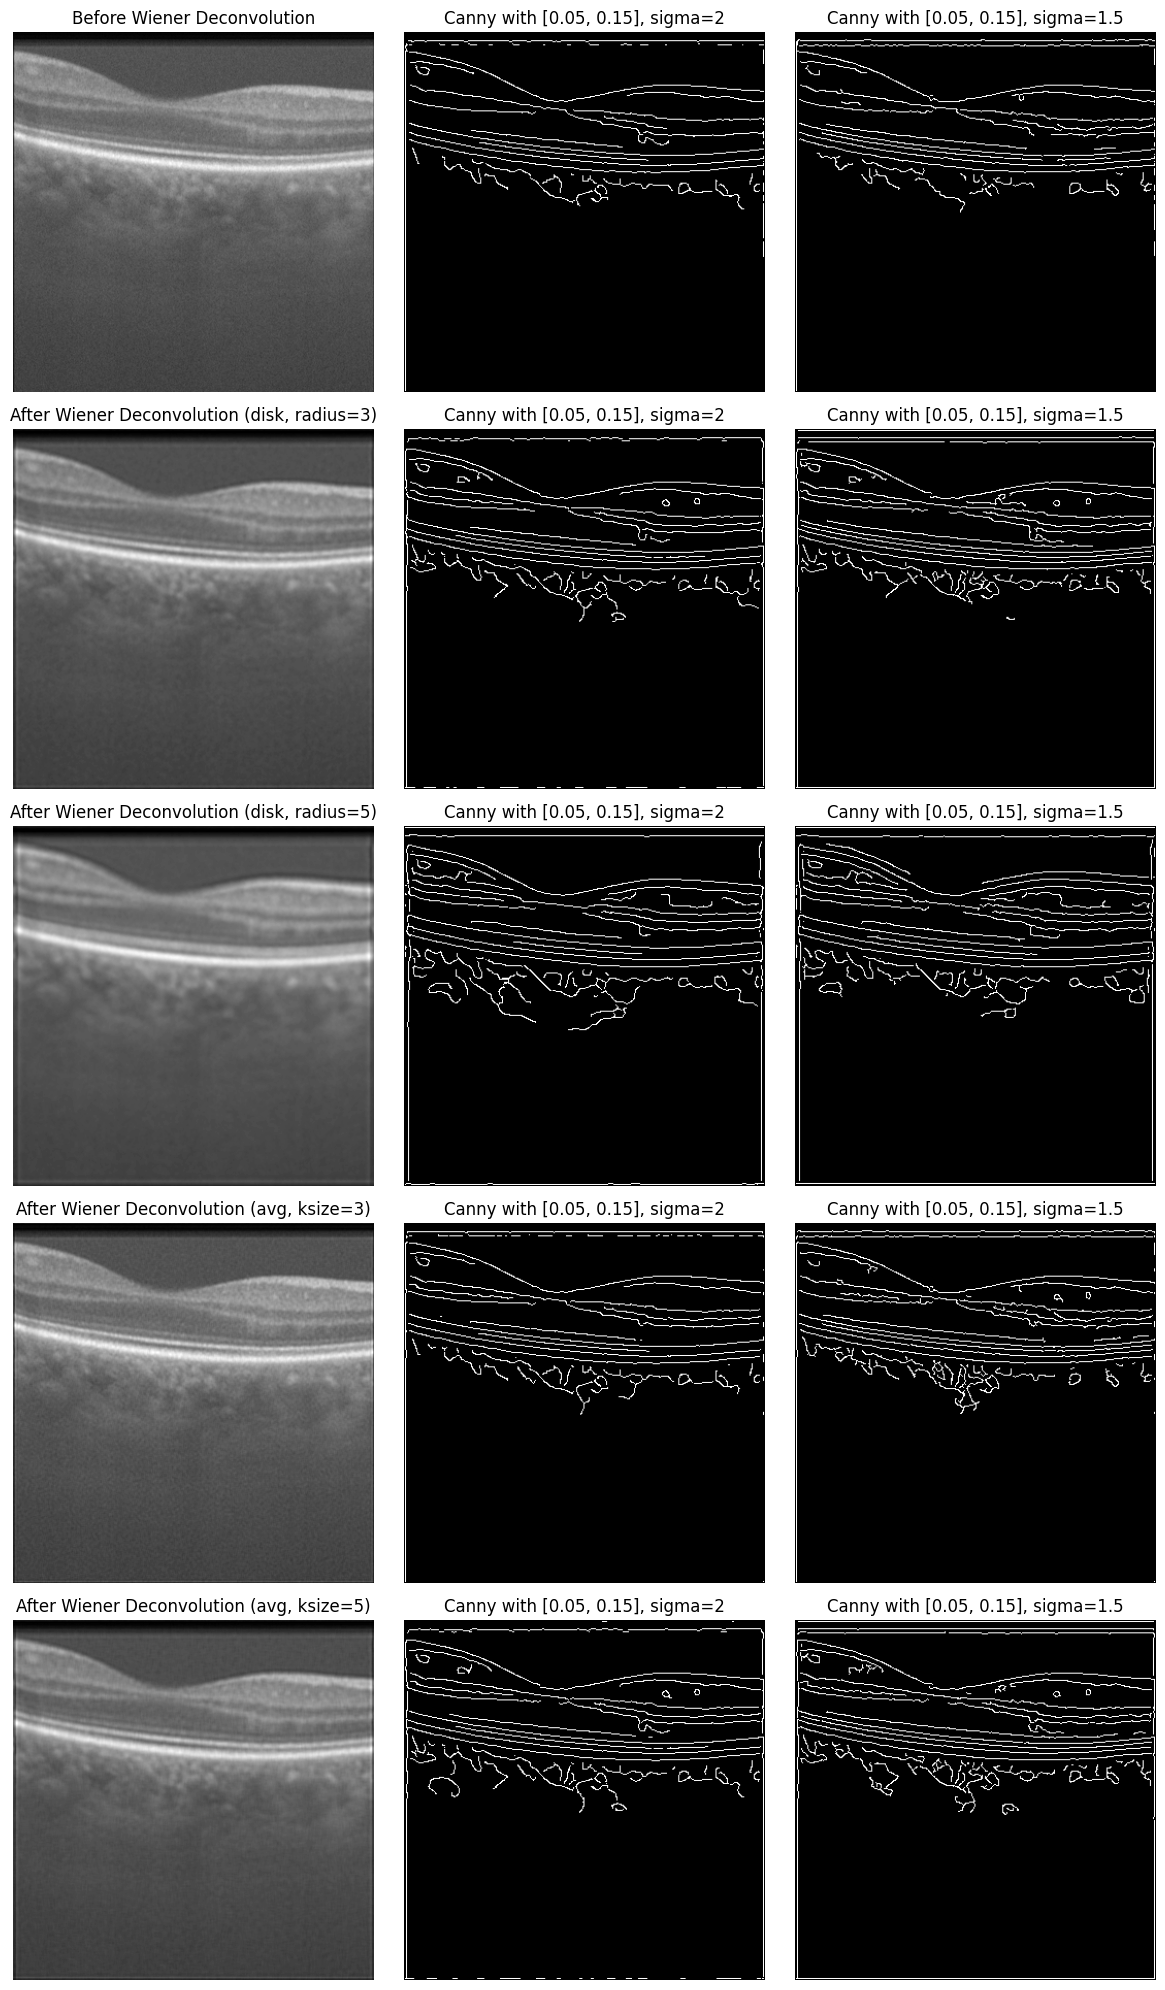

In [5]:
images = [[tavg_input_images[0], matlab1['canny_20'], matlab1['canny_15']],
          [matlab2['wnr_img'], matlab2['canny_20'], matlab2['canny_15']],
          [matlab3['wnr_img'], matlab3['canny_20'], matlab3['canny_15']],
          [matlab4['wnr_img'], matlab4['canny_20'], matlab4['canny_15']],
          [matlab5['wnr_img'], matlab5['canny_20'], matlab5['canny_15']]]
titles = [['Before Wiener Deconvolution', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5'],
          ['After Wiener Deconvolution (disk, radius=3)', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5'],
          ['After Wiener Deconvolution (disk, radius=5)', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5'],
          ['After Wiener Deconvolution (avg, ksize=3)', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5'],
          ['After Wiener Deconvolution (avg, ksize=5)', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5']]

plot_images(images, titles, dpi=100)

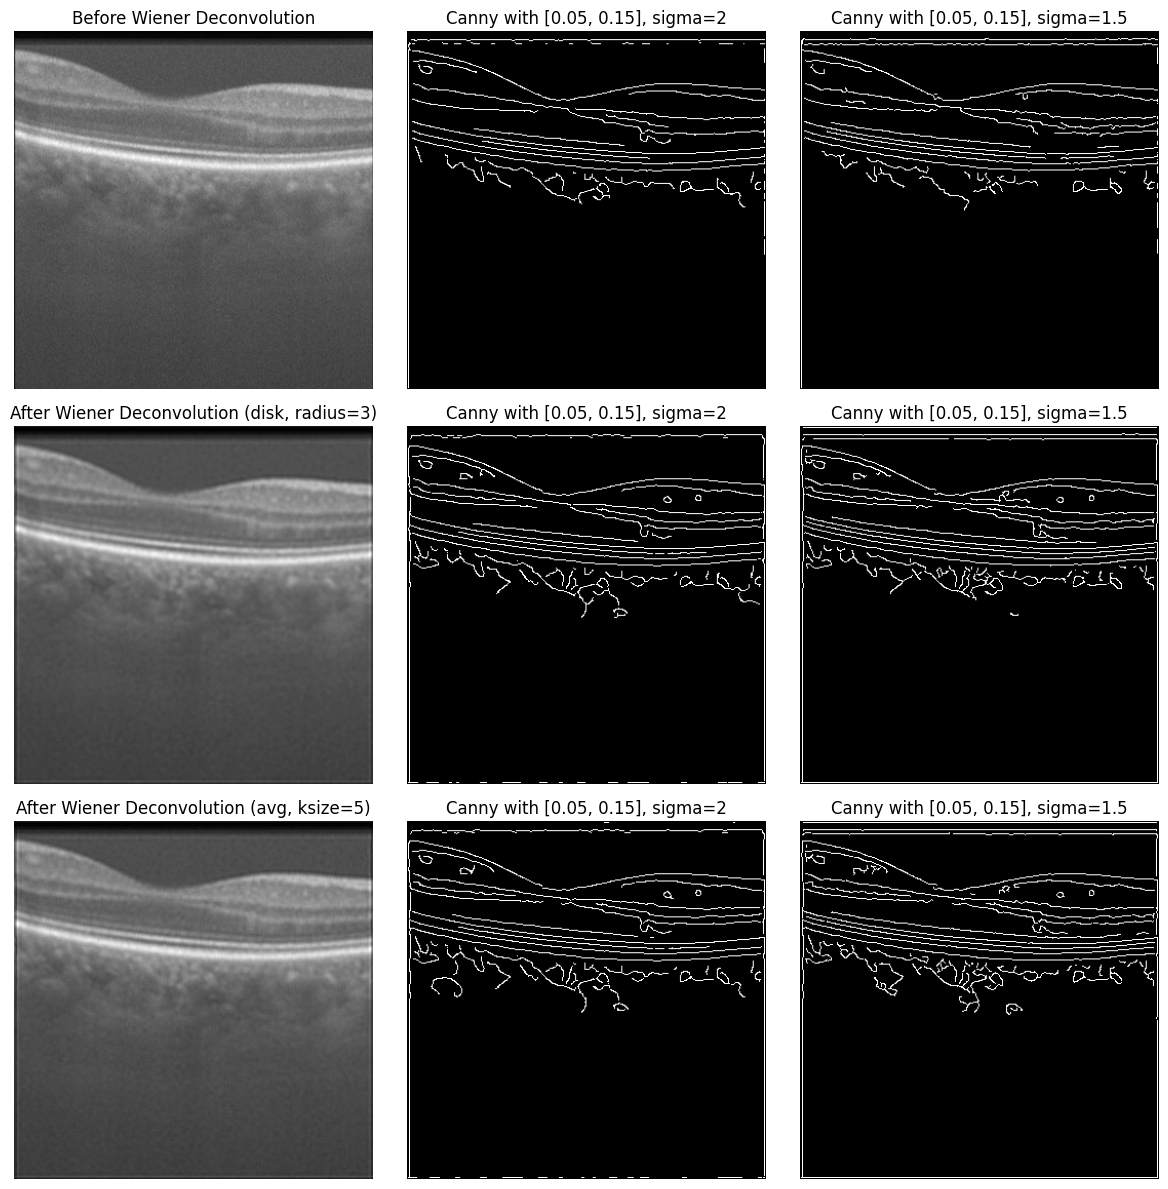

In [6]:
images = [[tavg_input_images[0], matlab1['canny_20'], matlab1['canny_15']],
          [matlab2['wnr_img'], matlab2['canny_20'], matlab2['canny_15']],
          [matlab5['wnr_img'], matlab5['canny_20'], matlab5['canny_15']]]
titles = [['Before Wiener Deconvolution', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5'],
          ['After Wiener Deconvolution (disk, radius=3)', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5'],
          ['After Wiener Deconvolution (avg, ksize=5)', 'Canny with [0.05, 0.15], sigma=2', 'Canny with [0.05, 0.15], sigma=1.5']]

plot_images(images, titles, dpi=100)